# Regression with the Boston House Dataset

This notebook is a slightly adapted version from the notebook *Chapter 10 - Predicting Continuous Target Variables with Regression Analysis* from Sebastian Raschka's excellent book [Python Machine Learning](http://is.gd/ULX1Ee).

We additionally import the [Seaborn module](http://stanford.edu/~mwaskom/software/seaborn/index.html). 

From its website: "Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics."
Seaborn is especially useful to do some preliminary, visually, statistics oriented exploratory data analysis. It is often used in combination with the stats module. In this notebook,however, we will use it without stats.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We will use the [housing dataset](http://archive.ics.uci.edu/ml/datasets/Housing) as our regression source. De dataset has the following features:
    
<pre>
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's
</pre>

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', sep = '\s+', header=None)
df.columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


MEDV is our target value. In contrast to the discrete, categorical targets, or class targets (values belonging to a restricted set of values) we saw before, MEDV is a continuous target variable. To predict its value we will use a regressor, rather than a classifier.
In the [scatterplot matrix](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html) below we plot some feature variables against our target variable. As we want to apply a linear regression model, we are looking for a linear relation between any feature variable and our target variable.
Can you identify a candidate?

In [5]:
df.shape
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


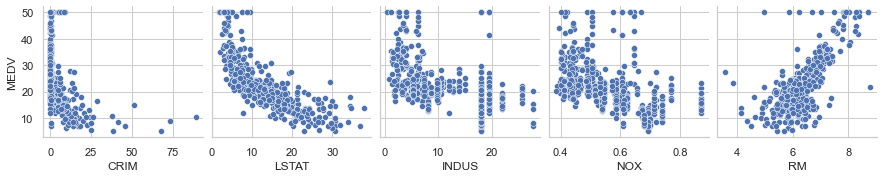

In [6]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df, x_vars=['CRIM', 'LSTAT', 'INDUS', 'NOX', 'RM'], y_vars=['MEDV'], height=2.5);
plt.show()

Another way to look at possible strong relationships between any feature varaible and our target variable is to look at correlations. We wil use the [Pearson product-moment correlation](http://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html) to analyse a possible correlation. Correlation is a value between -1 and 1. -1 for a strong negative relation, 0 for no relation at all and 1 for a strong positive relation.
We will use a heatmap to visualize the correlation. There is a lot of noise in this heatmap. In fact, we are only interested in the first 5 cells of the last row as we are only interested in a correlation with our target variable. 

Can you come up with a better visualization for correlation? Perhaps a plain bar chart?

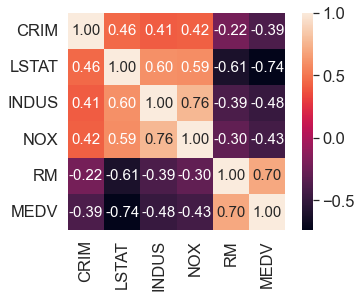

In [7]:
cols = ['CRIM', 'LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
cm = np.corrcoef(df[cols].values, rowvar=0)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 15},
    yticklabels=cols,
    xticklabels=cols)
plt.show()

## Preprocessing
We see strong correlations between LSTAT and MEDV and RM and MEDV. As we saw in our scatter plot also a linear relation between RM and MEDV, RM is the feature we pick to base our linear regression model on.

In [8]:
X = df[['RM']].values
y = df['MEDV'].values

We are going to split the data into training and test data set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=0
)

## Modeling

Now we are going to apply linear regression

In [10]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.311
Intercept: -35.994


## Evaluation
Now let's look at the mean square error and r square. And how that line that we found ealier relates to our measures in the selected feature variable.

In [11]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))

MSE train: 42.158, test: 47.033


In [12]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' % 
    (r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred)))

R^2 train: 0.503, test: 0.435


Let's plot the line.

In [13]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')    
    return None

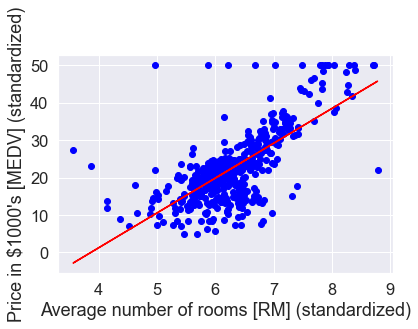

In [14]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.show()

That doesn't look too odd.
What we see is that there are quite a lot outliers: points that aren't really in the thick cloud. There are many statistical techniques to remove outliers from your measures. Instead of using such a technique, we will apply a linear regressor that is less susceptible for outliers: [RANdom SAmple Consensus (RANSAC)](http://scikit-learn.org/stable/modules/linear_model.html#ransac-regression)

## Preprocessing
We use the same feature and the same train test split as before

## Modeling
We use the RANSAC modeling

In [15]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(
    max_trials=1000000,
    min_samples=10,
    loss='absolute_loss',                     
    #residual_metric=lambda x: np.sum(np.abs(x), axis=1), 
    residual_threshold=2.0, 
    random_state=0)
ransac.fit(X_train, y_train)
y_train_pred = ransac.predict(X_train)
y_test_pred = ransac.predict(X_test)

Let's plot what Mr Ransac considered outliers and inliers.

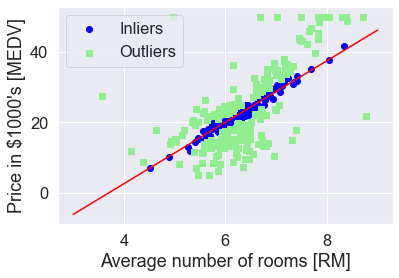

In [16]:
inlier_mask = ransac.inlier_mask_
# outliers = !inliers
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
#print(line_X)
#print(line_X.shape)

line_X_2d = line_X.reshape(-1,1)
#print(line_X_2d)
#print(line_X_2d.shape)

line_y_ransac = ransac.predict(line_X_2d)

# Plot
plt.scatter(X_train[inlier_mask], y_train[inlier_mask], c='blue', marker='o', label='Inliers')
plt.scatter(X_train[outlier_mask], y_train[outlier_mask], c='lightgreen', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper left')
plt.show()

Has this lead to a different slope and intercept? - It has!

In [17]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 8.722
Intercept: -32.293


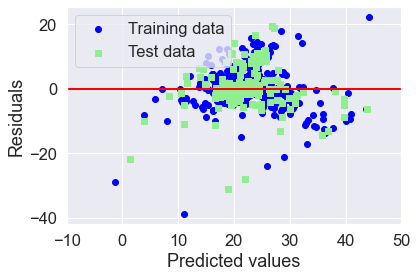

In [18]:
plt.scatter(y_train_pred, y_train_pred - y_train,
    c='blue', marker='o', label='Training data'
)
plt.scatter(y_test_pred,  y_test_pred - y_test,
    c='lightgreen', marker='s', label='Test data'
)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))

MSE train: 42.329, test: 46.800


In [20]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' % 
    (r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred)))

R^2 train: 0.501, test: 0.438


## Now it is your turn. 

### Since LSTAT has also strong correlation with MEDV. Now let's select two features and perform the linear regression. Compare the evaluation with before. Which model is better according to you, and why? Compare your reasoning with another student.

In [21]:
X = df[['LSTAT']].values
y = df['MEDV'].values

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=0
)

In [23]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: -0.968
Intercept: 34.790


In [24]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))

MSE train: 37.934, test: 39.817


In [34]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' % 
    (r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred)))

R^2 train: 0.552, test: 0.522


In [35]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')    
    return None

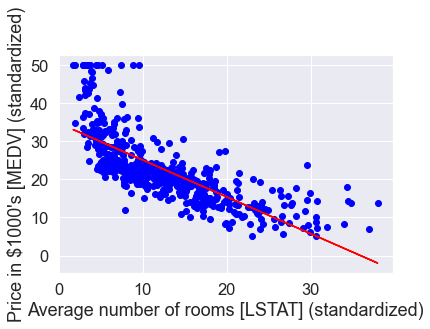

In [36]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [LSTAT] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.show()

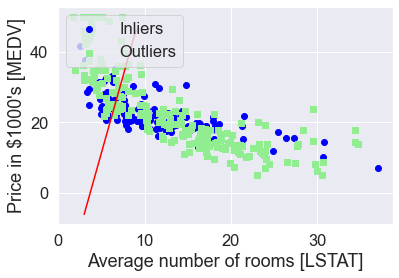

In [37]:
inlier_mask = ransac.inlier_mask_
# outliers = !inliers
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
#print(line_X)
#print(line_X.shape)

line_X_2d = line_X.reshape(-1,1)
#print(line_X_2d)
#print(line_X_2d.shape)

line_y_ransac = ransac.predict(line_X_2d)

# Plot
plt.scatter(X_train[inlier_mask], y_train[inlier_mask], c='blue', marker='o', label='Inliers')
plt.scatter(X_train[outlier_mask], y_train[outlier_mask], c='lightgreen', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('Average number of rooms [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper left')
plt.show()



I think the other model is better, this one deletes allot of outliers,
 it would probably be better to use Polynomial Regression here, since ot flows in a curve

### Instead of RANSAC, can you manually find out the outlier and remove the outlier? Compare the prediction result

### Or look for another algorithm such as Ridge or SDGClassifier to remove the outlier

C:\Users\megin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

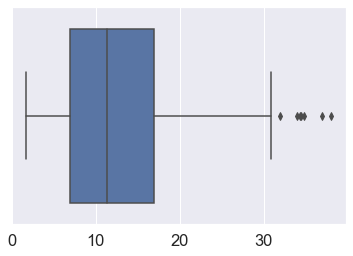

In [53]:
import seaborn as sns
sns.boxplot(X)

In the boxplot you can clearly see the outliers are all above 30

C:\Users\megin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

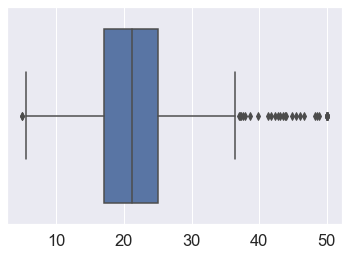

In [52]:
sns.boxplot(y)

Here there is 1 outlier before ~3 and the others above ~38

In [41]:
# Position of the Outlier
outlier = np.where(df['LSTAT']>30)
print(np.where(df['LSTAT']>30))

(array([ 48, 141, 373, 374, 384, 385, 387, 388, 398, 412, 414, 438],
      dtype=int64),)


here we have all the outliers, we would then delete them

In [44]:
#df.drop(df.index[df['LSTAT'] != ['48, 141, 373, 374, 384, 385, 387, 388, 398, 412, 414, 438'] ,axis=0)

<AxesSubplot:xlabel='LSTAT', ylabel='Count'>

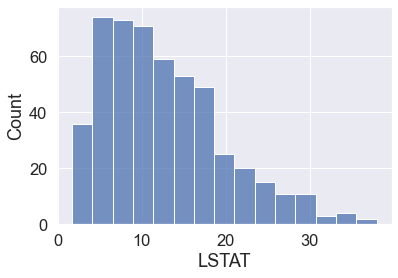

In [50]:
sns.histplot(df['LSTAT'])

and then it wouldnt show them anymore, but I couldnt figure out how to delete them